

**Author:** Prof. Priyanka Shahane.

**Problem Statement:** To classify the flower species based on petal length & petal width using K-means algorithm of unsupervised machine learning.



**Technical Stack**: Scikit Learn, Pandas, Matplotlib

In [5]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline


**Step 1 -** Loading the dataset

In [6]:
df = pd.read_csv("Iris.csv")
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


**Step 2 -** Visualizing the input data 

Text(0, 0.5, 'Petal Length')

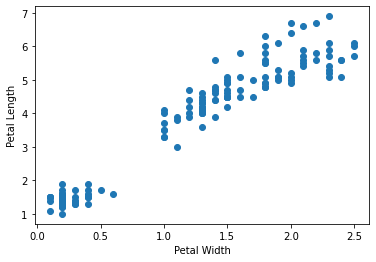

In [7]:
plt.scatter(df.PetalWidthCm,df.PetalLengthCm)
plt.xlabel('Petal Width')
plt.ylabel('Petal Length')

**Step 3** - Identifying optimum number of clusters using Elbow plot method

In [8]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['PetalWidthCm','PetalLengthCm']])
    sse.append(km.inertia_)

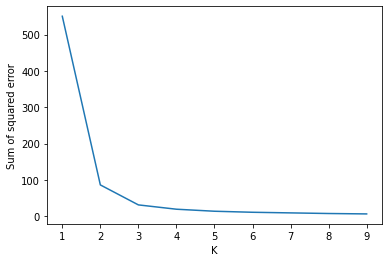

In [9]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

**Step 4** - Applying K means algorithm

In [10]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['PetalWidthCm','PetalLengthCm']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [11]:
df['cluster']=y_predicted
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1


In [12]:
km.cluster_centers_

array([[2.0375    , 5.59583333],
       [0.244     , 1.464     ],
       [1.34230769, 4.26923077]])

**Step 5 -** Visualising clusters

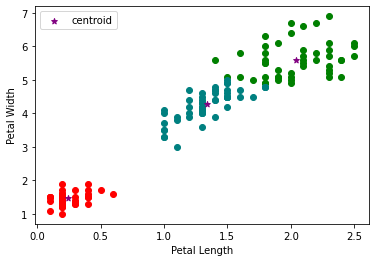

In [13]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.PetalWidthCm,df1.PetalLengthCm,color='green')
plt.scatter(df2.PetalWidthCm,df2.PetalLengthCm,color='red')
plt.scatter(df3.PetalWidthCm,df3.PetalLengthCm,color='Teal')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()


**Step 6** - Pre-processing using min-max scalar

In [14]:
scaler = MinMaxScaler()
scaler.fit(df[['PetalLengthCm']])
df['PetalLengthCm'] = scaler.transform(df[['PetalLengthCm']])

scaler.fit(df[['PetalWidthCm']])
df['PetalWidthCm'] = scaler.transform(df[['PetalWidthCm']])

In [15]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,1,5.1,3.5,0.067797,0.041667,Iris-setosa,1
1,2,4.9,3.0,0.067797,0.041667,Iris-setosa,1
2,3,4.7,3.2,0.050847,0.041667,Iris-setosa,1
3,4,4.6,3.1,0.084746,0.041667,Iris-setosa,1
4,5,5.0,3.6,0.067797,0.041667,Iris-setosa,1


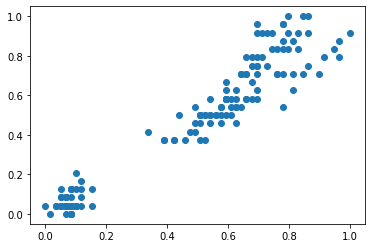

In [16]:
plt.scatter(df.PetalLengthCm,df.PetalWidthCm)


**Step 7** - Applying K means algorithm




In [17]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['PetalLengthCm','PetalWidthCm']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [18]:
df['cluster']=y_predicted
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,1,5.1,3.5,0.067797,0.041667,Iris-setosa,1
1,2,4.9,3.0,0.067797,0.041667,Iris-setosa,1
2,3,4.7,3.2,0.050847,0.041667,Iris-setosa,1
3,4,4.6,3.1,0.084746,0.041667,Iris-setosa,1
4,5,5.0,3.6,0.067797,0.041667,Iris-setosa,1


In [19]:
km.cluster_centers_

array([[0.7740113 , 0.81510417],
       [0.07864407, 0.06      ],
       [0.55867014, 0.51041667]])

**Step 8** - Visualising clusters

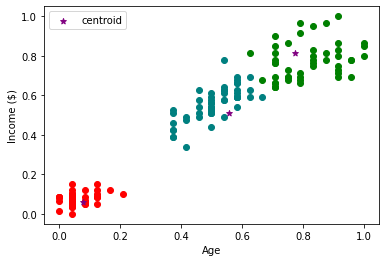

In [20]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.PetalWidthCm,df1.PetalLengthCm,color='green')
plt.scatter(df2.PetalWidthCm,df2.PetalLengthCm,color='red')
plt.scatter(df3.PetalWidthCm,df3.PetalLengthCm,color='Teal')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()
